In [1]:
import numpy as np

fileName = "storage/pos01_01.csv"
data = np.genfromtxt(fileName, delimiter=",")

dataShape = data.shape
print("dataShape1", dataShape)

data = data.T.reshape(31, 3, -1)
# going through every tenth time step (joints, x/y/z, time step)
data[:,(0,1,2),:] = data[:,(0,2,1),:]

data_by_frames = data.reshape(93,-1) # Go back to two dimensions
print(data_by_frames.shape)

data1 = data_by_frames[:,0:200,np.newaxis]        # First 200 frames; 93x200x1
data2 = data_by_frames[:,np.newaxis,1950:2150]    # 200 frames near 2040; 93x1x200

data_diffs = data1-data2                # Pairwise difference of each possible pair of frames from those ranges
                                        # 93x200x200

data_diffs = (data_diffs**2).sum(axis=0) # 200x200
                                         # data_diffs[t1,t2] will be how different frame t1 is from t2

t1, t2 = np.unravel_index(data_diffs.argmin(), data_diffs.shape)
t2+=1950
print(t1)
print(t2)

# starts at frame t1 and goes to frame t2
data = data[:,:,t1:t2]

# take all of data and the first 400 frames of data and concat them along time axis
# (all frames of data, followed by first 400 frames of data)
data = np.concatenate([data[:,:,:], data[:,:,:400]], axis=2)
np.savetxt("storage/loopingData.csv", data.T.reshape(-1, 93), delimiter=",")

# getting everything, but every tenth frame
data = data[:,:,::10]

dataShape1 (2751, 93)
(93, 2751)
171
2109


In [2]:
"""
============
3D animation
============

A simple example of an animated plot... In 3D!
"""
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
#%matplotlib inline
from IPython.display import HTML, display


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines


print("first cell data line 44", data.shape)

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
#data = [Gen_RandLine(25, 3) for index in range(50)]
#print(np.array(data).shape)

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]
print("lines length", len(lines))
dataShape = data.shape
print("first cell dataShape line 58", dataShape)

# Setting the axes properties
ax.set_xlim3d([-20, 20])
ax.set_xlabel('X')

ax.set_ylim3d([-20, 20])
ax.set_ylabel('Y')

ax.set_zlim3d([-20, 20])
ax.set_zlabel('Z')

ax.set_title('3D Test')

print("first cell data line 72", data.shape)

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, data.shape[2], fargs=(data, lines),
                                   interval=50, blit=False)

display(HTML(line_ani.to_html5_video()))

print(data[0])

first cell data line 44 (31, 3, 234)
lines length 31
first cell dataShape line 58 (31, 3, 234)
first cell data line 72 (31, 3, 234)


[[ 9.61599e+00  9.58242e+00  9.51467e+00  9.37858e+00  9.25955e+00
   9.24003e+00  9.13152e+00  9.09056e+00  9.02940e+00  8.98758e+00
   8.93844e+00  8.82477e+00  8.89065e+00  9.03828e+00  9.08694e+00
   9.09527e+00  9.07291e+00  9.04511e+00  9.04529e+00  9.07229e+00
   9.11612e+00  9.16242e+00  9.15844e+00  9.10368e+00  8.97782e+00
   8.91971e+00  8.87444e+00  8.82867e+00  8.79561e+00  8.73691e+00
   8.68774e+00  8.52749e+00  8.58097e+00  8.60933e+00  8.64805e+00
   8.68749e+00  8.73657e+00  8.79076e+00  8.82365e+00  8.80392e+00
   8.74443e+00  8.67281e+00  8.72609e+00  8.70278e+00  8.71555e+00
   8.74451e+00  8.74295e+00  8.71672e+00  8.65931e+00  8.75430e+00
   8.81830e+00  8.81919e+00  8.81931e+00  8.82813e+00  8.83227e+00
   8.83656e+00  8.86290e+00  8.92307e+00  8.97433e+00  8.96319e+00
   8.90793e+00  8.93139e+00  8.90962e+00  8.90081e+00  8.89689e+00
   8.87170e+00  8.83288e+00  8.75621e+00  8.81304e+00  8.98097e+00
   9.13976e+00  9.25779e+00  9.34853e+00  9.38522e+00  9.37794

[[ 9.61599e+00  9.58242e+00  9.51467e+00  9.37858e+00  9.25955e+00
   9.24003e+00  9.13152e+00  9.09056e+00  9.02940e+00  8.98758e+00
   8.93844e+00  8.82477e+00  8.89065e+00  9.03828e+00  9.08694e+00
   9.09527e+00  9.07291e+00  9.04511e+00  9.04529e+00  9.07229e+00
   9.11612e+00  9.16242e+00  9.15844e+00  9.10368e+00  8.97782e+00
   8.91971e+00  8.87444e+00  8.82867e+00  8.79561e+00  8.73691e+00
   8.68774e+00  8.52749e+00  8.58097e+00  8.60933e+00  8.64805e+00
   8.68749e+00  8.73657e+00  8.79076e+00  8.82365e+00  8.80392e+00
   8.74443e+00  8.67281e+00  8.72609e+00  8.70278e+00  8.71555e+00
   8.74451e+00  8.74295e+00  8.71672e+00  8.65931e+00  8.75430e+00
   8.81830e+00  8.81919e+00  8.81931e+00  8.82813e+00  8.83227e+00
   8.83656e+00  8.86290e+00  8.92307e+00  8.97433e+00  8.96319e+00
   8.90793e+00  8.93139e+00  8.90962e+00  8.90081e+00  8.89689e+00
   8.87170e+00  8.83288e+00  8.75621e+00  8.81304e+00  8.98097e+00
   9.13976e+00  9.25779e+00  9.34853e+00  9.38522e+00  9.37794

lines length 31
dataShape line 21 (31, 3, 234)
data's shape line 35  (31, 3, 234)


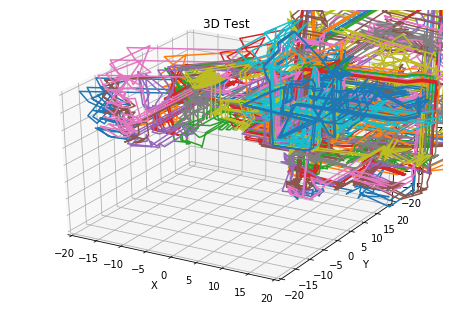

In [3]:
def animateData(data): 
    print("data's shape line 2 ", data.shape)
    data = data.T.reshape(31, 3, -1)
    # going through every tenth time step (joints, x/y/z, time step)
    data[:,(0,1,2),:] = data[:,(0,2,1),:]
    
    print("data's shape line 7 ", data.shape)
    
    # Attaching 3D axis to the figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Fifty lines of random 3-D lines
    #data = [Gen_RandLine(25, 3) for index in range(50)]
    #print(np.array(data).shape)

    # Creating fifty line objects.
    # NOTE: Can't pass empty arrays into 3d version of plot()
    lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]
    print("lines length", len(lines))
    dataShape = data.shape
    print("dataShape line 21", dataShape)

    # Setting the axes properties
    ax.set_xlim3d([-20, 20])
    ax.set_xlabel('X')

    ax.set_ylim3d([-20, 20])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-20, 20])
    ax.set_zlabel('Z')

    ax.set_title('3D Test')
    
    print("data's shape line 35 ", data.shape)

    # Creating the Animation object
    line_ani = animation.FuncAnimation(fig, update_lines, data.shape[2], fargs=(data, lines),
                                       interval=50, blit=False)
    
    display(HTML(line_ani.to_html5_video()))
    
    
print(data[0])
    
# run the function 
animateData(data)